# 임베딩

임베딩의 역할
- 단어 및 문장 간 관련성 계산
- 의미적 혹은 문법적 정보의 함축

# 희소표현

In [1]:
# 원 핫 인코딩 적용
import pandas as pd
class2=pd.read_csv("C:/Users/이신행/OneDrive/바탕 화면/딥러닝텐서플로교과서_예제파일/chap10/data/class2.csv")

from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()
onehot_encoder = preprocessing.OneHotEncoder() # 데이터를 숫자형식으로 표현

train_x = label_encoder.fit_transform(class2['class2'])
train_x

array([2, 2, 1, 0, 1, 0])

# 횟수기반 임베딩

- 단어가 출현한 빈도를 고려햐여 이용하는 방법

## 카운터 벡터

문서 집합에서 단어를 토큰으로 생성하고 각 단어의 출현 빈도수를 이용하여 인코딩해 벡터로 만드는 방법 즉 토크나이징과 벡터화가 동시에 가능

In [2]:
# 코퍼스에 카운터 벡터 적용
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
    'This is last chance.',
    'and if you do not have this chance.',
    'you will never get any chance.',
    'will you do get this one?',
    'please, get this chance',
]
vect = CountVectorizer()
vect.fit(corpus)
vect.vocabulary_

{'this': 13,
 'is': 7,
 'last': 8,
 'chance': 2,
 'and': 0,
 'if': 6,
 'you': 15,
 'do': 3,
 'not': 10,
 'have': 5,
 'will': 14,
 'never': 9,
 'get': 4,
 'any': 1,
 'one': 11,
 'please': 12}

In [3]:
# 배열 변환
vect.transform(['you will nerver get any chance']).toarray()

array([[0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]], dtype=int64)

In [4]:
# 불용어를 제거한 카운터벡터
vect=CountVectorizer(stop_words=['and','is','please','this']).fit(corpus)
vect.vocabulary_

{'last': 6,
 'chance': 1,
 'if': 5,
 'you': 11,
 'do': 2,
 'not': 8,
 'have': 4,
 'will': 10,
 'never': 7,
 'get': 3,
 'any': 0,
 'one': 9}

# TF-IDF
정보 검색론에서 가중치를 구할때 사용되는 알고리즘
- TF : 문서 내에서 특정 단어가 출현한 빈도
- DF : 한 단어가 전체 문서에서 얼마나 공통적으로 많이 등장하는지 나타낸 값 즉, 특정 단어가 나타난 문서 개수
- IDF : DF값의 역수
- 스무딩 : 빈도가 0이라면 분모가 0이 되는 상황이 발생하는데 이를 방지하고자 분모에 1을 더해주는 방법

- 사용되는 상황 : 
    - 키워드 검색을 기반으로 하는 검색 엔진
    - 중요 키워드 분석
    - 검색 엔진에서 검색 결과의 순위 산정

In [5]:
# TF-IDF를 적용한 후 행렬로 변환
from sklearn.feature_extraction.text import TfidfVectorizer
doc=['I like machine learning','I love deep learning','I run everyday']
tfidf_vectorizer=TfidfVectorizer(min_df=1)
tfidf_matrix=tfidf_vectorizer.fit_transform(doc)
doc_distance=(tfidf_matrix*tfidf_matrix.T)
print('유사도를 위한', str(doc_distance.get_shape()[0]), 'x',str(doc_distance.get_shape()[1]),'행렬을 만들었습니다.')
print(doc_distance.toarray())

유사도를 위한 3 x 3 행렬을 만들었습니다.
[[1.       0.224325 0.      ]
 [0.224325 1.       0.      ]
 [0.       0.       1.      ]]


# 예측 기반 임베딩

신경망 구조 혹은 모델을 이용하여 특정 문맥에서 어떤 단어가 나올지를 예측하면서 단어를 벡터로 만드는 방식

## 워드투벡터(Word2Vec)
신경망 알고리즘으로 주어진 텍스트에서 텍스트의 각 단어마다 하나씩 일련의 벡터 출력

-> 워드투벡터를 사용하면 특정 단어의 동의어를 찾을 수 있음



In [6]:
# 데이터셋을 메모리로 로딩하고 토큰화 사용
from nltk.tokenize import sent_tokenize,word_tokenize
import warnings
warnings.filterwarnings(action='ignore')
import gensim
from gensim.models import Word2Vec

sample=open('C:/Users/이신행/OneDrive/바탕 화면/딥러닝텐서플로교과서_예제파일/chap10/data/peter.txt','r',encoding='UTF-8')
# 피터팬 데이터셋 로딩
s=sample.read()

f=s.replace('\n',' ') # 줄바꿈을 공백으로 변환
data=[]

for i in sent_tokenize(f): # 로딩한 파일을 각 문장마다 반복
    temp=[]
    for j in word_tokenize(i): # 문장을 각 단어로 토큰화 
        temp.append(j.lower()) # 토큰화된 단어를 소문자로 변환하여 temp에 저장
    data.append(temp)
data

[['once',
  'upon',
  'a',
  'time',
  'in',
  'london',
  ',',
  'the',
  'darlings',
  'went',
  'out',
  'to',
  'a',
  'dinner',
  'party',
  'leaving',
  'their',
  'three',
  'children',
  'wendy',
  ',',
  'jhon',
  ',',
  'and',
  'michael',
  'at',
  'home',
  '.'],
 ['after',
  'wendy',
  'had',
  'tucked',
  'her',
  'younger',
  'brothers',
  'jhon',
  'and',
  'michael',
  'to',
  'bed',
  ',',
  'she',
  'went',
  'to',
  'read',
  'a',
  'book',
  '.'],
 ['she', 'heard', 'a', 'boy', 'sobbing', 'outside', 'her', 'window', '.'],
 ['he', 'was', 'flying', '.'],
 ['there', 'was', 'little', 'fairy', 'fluttering', 'around', 'him', '.'],
 ['wendy', 'opened', 'the', 'window', 'to', 'talk', 'to', 'him', '.'],
 ['“', 'hello', '!'],
 ['who', 'are', 'you', '?'],
 ['why', 'are', 'you', 'crying', '”', ',', 'wendy', 'asked', 'him', '.'],
 ['“', 'my', 'name', 'is', 'peter', 'pan', '.'],
 ['my',
  'shadow',
  'wouldn',
  '’',
  't',
  'stock',
  'to',
  'me.',
  '”',
  ',',
  'he',
  'rep

## CBOW
단어를 여러개 나열한 후 이와 관련된 단어를 추정하는 방식 즉 문장에서 등장하는 n개의 단어 열에서 다음에 등장할 단어를 예측

In [7]:
!pip install -U gensim

In [8]:
# 데이터셋에 CBOW 적용 후 peter와 wendy의 유사성 확인
model1 = gensim.models.Word2Vec(data, min_count = 1,  
                              vector_size = 100, window = 5) # 1
print("Cosine similarity between 'peter' " +
                 "'wendy' - CBOW : ", 
      model1.wv.similarity('peter', 'wendy'))


Cosine similarity between 'peter' 'wendy' - CBOW :  0.07439384


- 1 : word2vec의 파라미터
    - data(첫번째 인자) : cbow을 적용할 데이터셋
    - min_count : 단어에 대해 최소 빈도수 제한(빈도가 적은 단어는 학습하지 않음)
    - size : 워드 벡터의 특징 값, 즉 임베딩된 벡터의 차원
    - window : 컨텍스트 윈도우 크기
    - sg : sg가 0이면 cbow, 1이면 skip-gram을 의미 기본값은 0

In [9]:
print("Cosine similarity between 'peter' " +
                 "'hook' - CBOW : ", 
      model1.wv.similarity('peter', 'hook')) 

Cosine similarity between 'peter' 'hook' - CBOW :  0.027709894


## skip-gram

CBOW방식과는 반대로 특정한 단어에서 문맥이 될 수 있는 단어를 예측, 즉 중심 단어에서 주변 단어를 예측하는 방법 사용

In [10]:
# 데이터셋에 skip-gram 적용 후 peter와 wendy 유사성 확인
model2 = gensim.models.Word2Vec(data, min_count = 1, vector_size = 100, 
                                             window = 5, sg = 1)
print("Cosine similarity between 'peter' " +
          "wendy' - Skip Gram : ", 
    model2.wv.similarity('peter', 'wendy'))

Cosine similarity between 'peter' wendy' - Skip Gram :  0.40088683


In [11]:
print("Cosine similarity between 'peter' " +
            "hook' - Skip Gram : ", 
      model2.wv.similarity('peter', 'hook')) 

Cosine similarity between 'peter' hook' - Skip Gram :  0.5201674


- CBOW와 skip-gram 중 어떤 알고리즘이 더 좋다고 결론을 내리기보다는 분석하고자 하는 데이터 성격, 분석에 대한 접근 방법 및 도출하고자 하는 결론 등을 종합적으로 고려하여 필요한 라이브러리를 사용할 수 있어야 함

## 패스트텍스트
워드투벡터의 단점을 보완하고자 페이스북에서 개발
- 기존 워드투벡터는분산표현을 이용하여 단어의 분산 분포가 유사한 단어들에 비슷한 벡터 값을 할당하여 표현 따라서 워드투벡터는 사전에 없는 단어에 대해서는 벡터 값을 얻을 수 없음
- 패스트텍스트는 노이즈에 강하며, 새로운 단어에 대해서는 형태적 유사성을 고려한 벡터값을 얻기 때문에, 자연어 처리 분야에서 많이 사용되는 알고리즘

#### 사전에 없는 단어에 벡터 값을 부여하는 방법
- 주어진 문서의 각 단어를 n그램으로 표현하는데, n의 설정에 따라 단어의 분리 수준이 결정
    - 예를 들어 n을 3으로 결정하면 This is deep learning book을 This is deep, is deep learning, deep learning book으로 분할한 후 임베딩
    
- 패스트텍스트는 인공 신경망을 이용하여 학습이 완료된 후 데이터셋의 모든 단어를 각  n-그램에 대해 임베딩함. 따라서 사전에 없는 단어가 등장한다면, n-그램으로 분리된 부분 단어와 유사도를 계산하여 의미를 유추할 수 있음

#### n-그램
n개의 어절/음절을 연쇄적으로 분류하여 그 빈도를 따짐. n이 1일때를 유니그램, 2일때 바이그램, 3일때 트라이그램이라고 부름

In [12]:
# 라이브러리 및 데이터 호출
from gensim.test.utils import common_texts
from gensim.models import FastText

model=FastText('C:/Users/이신행/OneDrive/바탕 화면/딥러닝텐서플로교과서_예제파일/chap10/data/peter.txt',vector_size=4, window=3, min_count=1, epochs=10) # 1

- 1 : FastText에서 사용하는 파라미터는 Word2Vec와 같음.
    - 첫번재 파라미터 : 패스트텍스트를 적용할 데이터셋
    - size : 학습할 임베딩의 크기, 즉 임베딩된 벡터의 차원
    - window : 고려할 앞뒤 폭(앞뒤 세단어)
    - min_count : 단어에 대한 최소 빈도수 제한(1회 이하 단어 무시)
    - iter(epochs) : 반복 횟수

In [13]:
# peter, wendy에 대한 코사인 유사도
sim_score=model.wv.similarity('peter','wendy')
print(sim_score)

0.45924556


In [14]:
# peter, hook에 대한 코사인 유사도
sim_score = model.wv.similarity('peter', 'hook')
print(sim_score)

0.04382521


In [15]:
# 라이브러리와 사전 훈련된 모델 호출
from __future__ import print_function
from gensim.models import KeyedVectors

model_kr = KeyedVectors.load_word2vec_format('C:/Users/이신행/OneDrive/바탕 화면/딥러닝텐서플로교과서_예제파일/chap10/data/wiki.ko.vec')

In [16]:
# 노력과 유사한 단어와 유사도 확인
find_similar_to='노력'

for similar_word in model_kr.similar_by_word(find_similar_to):
    print('Word : {0}, Similarity : {1:.2f}'.format(similar_word[0],similar_word[1]))

Word : 노력함, Similarity : 0.80
Word : 노력중, Similarity : 0.75
Word : 노력만, Similarity : 0.72
Word : 노력과, Similarity : 0.71
Word : 노력의, Similarity : 0.69
Word : 노력가, Similarity : 0.69
Word : 노력이나, Similarity : 0.69
Word : 노력없이, Similarity : 0.68
Word : 노력맨, Similarity : 0.68
Word : 노력보다는, Similarity : 0.68


In [17]:
# 동물, 육식동물에는 긍정적이지만, 사람에는 부정적인 단어와 유사도 확인
similarities=model_kr.most_similar(positive=['동물','육식동물'],negative=['사람'])
print(similarities)

[('초식동물', 0.7804122567176819), ('거대동물', 0.7547270655632019), ('육식동물의', 0.7547166347503662), ('유두동물', 0.753511369228363), ('반추동물', 0.7470758557319641), ('독동물', 0.7466292977333069), ('육상동물', 0.7460315823554993), ('유즐동물', 0.7450903654098511), ('극피동물', 0.7449344396591187), ('복모동물', 0.7424346208572388)]


## 횟수/예측 기반 임베딩
## 글로브
- 횟수 기반 LSA와 예측 기반 워드투벡터의 단점을 보완하기 위한 모델
- 단어에 대한 글로벌 동시 발생 확률 정보를 포함하는 단어 임베딩 방법 즉 단어에 대한 통계 정보와 SKIP-GRAM을 합친 방법

In [18]:
# 라이브러리 호출 및 데이터셋 로딩
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.decomposition import PCA
from gensim.test.utils import datapath,get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

glove_file=datapath('C:/Users/이신행/OneDrive/바탕 화면/딥러닝텐서플로교과서_예제파일/chap10/data/glove.6B.100d.txt') # 1
word2vec_glove_file=get_tmpfile('glove.6B.100d.word2vec.txt') # 글로브 데이터를 워드투벡터 형태로 변환
glove2word2vec(glove_file,word2vec_glove_file) # 2

(400000, 100)

- 1 : 내려받은 glove.6B.100d.txt파일을 메모리로 로딩
- 2 : gensim의 glove2word2vec()함수를 사용해 glove를 워드투벡터 형태로 변경 가능. 이후부터는 변경된 형태를 이용하여 기존 워드투벡터의 함수를 사용할 수 있음
    - glove_file(첫번째 인자) : 글로브 입력 파일
    - 두번째 인자 : 워드투벡터 출력 파일

In [19]:
# bill과 유사한 단어의 리스트 반환
model=KeyedVectors.load_word2vec_format(word2vec_glove_file) # 파이썬 콘솔에서 결과를 확인하기 위해 word2vec_glove_file 파일을 로딩
model.most_similar('bill') # 단어(bill) 기준으로 가장 유사한 단어들의 리스트 보여줌

[('legislation', 0.8072139024734497),
 ('proposal', 0.7306862473487854),
 ('senate', 0.7142540812492371),
 ('bills', 0.7044401168823242),
 ('measure', 0.6958035230636597),
 ('passed', 0.690624475479126),
 ('amendment', 0.6846879720687866),
 ('provision', 0.684556782245636),
 ('plan', 0.6816462874412537),
 ('clinton', 0.6663140058517456)]

In [20]:
# cherry와 유사한 단어의 리스트 반환
model.most_similar('cherry') # 단어 기준으로 가장 유사한 단어들의 리스트 보여줌

[('peach', 0.6888099312782288),
 ('mango', 0.6838189959526062),
 ('plum', 0.6684104204177856),
 ('berry', 0.659035861492157),
 ('grove', 0.6581552028656006),
 ('blossom', 0.6503506302833557),
 ('raspberry', 0.6477391719818115),
 ('strawberry', 0.6442098617553711),
 ('pine', 0.6390928626060486),
 ('almond', 0.6379212737083435)]

In [21]:
# cherry와 관련성 없는 단어의 리스트들 반환
model.most_similar(negative=['cherry']) # 단어와 관련성이 없는 단어들을 추출

[('kazushige', 0.48343509435653687),
 ('askerov', 0.4778185486793518),
 ('lakpa', 0.46915265917778015),
 ('ex-gay', 0.45713332295417786),
 ('tadayoshi', 0.4522107243537903),
 ('turani', 0.4481006860733032),
 ('saglam', 0.446959912776947),
 ('aijun', 0.4435270130634308),
 ('adjustors', 0.44235295057296753),
 ('nyum', 0.4423118233680725)]

In [22]:
# woman, king과 유사성이 높으면서 man과 관련성이 없는 단어를 반환
result=model.most_similar(positive=['woman','king'],negative=['man'])
print('{} : {:.4f}'.format(*result[0]))

queen : 0.7699


- 단어간 긍정적, 부정적 관련성을 고려하여 정확하게 결과를 반환하고 있는 것을 확인할 수 있음

In [23]:
# australia, beer, france와 관련성이 있는 단어를 반환
def analogy(x1, x2, y1):
    result = model.most_similar(positive=[y1, x2], negative=[x1])
    return result[0][0]
analogy('australia', 'beer', 'france')

'champagne'

In [24]:
# tall,tallest,long와 관련성이 있는 단어를 반환
analogy('tall','tallest','long')

'longest'

In [25]:
# breakfast cereal dinner lunch중 유사도가 낮은 단어를 반환
print(model.doesnt_match("breakfast cereal dinner lunch".split())) # 유사도가 가장 낮은 단어 반환

cereal


# 트랜스포머 어텐션
- 어텐션 : 언어 번역에서 주로 사용, 인코더와 디코더 네트워크 사용. 즉 입력에 대한 벡터 변환을 인코더에서 처리하고 모든 벡터를 디코더로 보냄. 이렇게 모든 벡터를 전달하는 이유는 기울기 소멸 문제를 해결하기 위해서임. 그렇지만 모든 벡터가 전달되기 때문에, 행렬 크기가 굉장히 커지는 단점이 있는데, 이를 해결하기 위해 소프트맥스함수를 사용해 가중합을 구하고 그 값을 디코더에 전달함

- 가중합만 전달되었더라도 정보를 많이 전달받은 디코더는 부담일 수 밖에 없음. 따라서 디코더는 은닉상태에 대해 중점적으로 집중해서 보아야할 벡터를 소프트맥스 함수로 점수를 매긴 후 각각을 은닉 상태의 벡터들과 곱함. 그리고 이 은닉 상태를 모두 더해 하나의 값으로 만듬. 즉, 어텐션은 모든 벡터중에서 꼭 살펴보아야 할 벡터에 집중하는 것

- 트랜스포머 : 어텐션을 극대화 하는 방법, 인코더, 디코더를 여러개 중첩시킨 구조, 각각의 인코더, 디코더를 블록이라 부름

- 인코더 : 단어를 벡터로 임베딩, 이를 셀프 어텐션과 전방향 신경망으로 전달함.
    - 셀프 어텐션 : 문장에서 각 단어끼리 얼마나 관계가 있는지 계산해서 반영 즉 문장안에서 단어간의 관계 파악할 수 있음
- 디코더 : 3개의 층 셀프 어텐션 층, 인코더-디코더 어텐션, 전방향 신경망 순으로 데이터 전달

## seq2seq
- 입력 시퀀스에 대한 출력 시퀀스를 만들기 위한 모델
- 번역에 초점을 둔 모델

In [26]:
# 라이브러리 호출
from __future__ import absolute_import, division, print_function, unicode_literals
 
import tensorflow as tf
import os 
import io
import re
import time
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.model_selection import train_test_split

In [27]:
# 데이터셋 전처리 함수 정의
def unicode_to_ascii(s):
    return ''.join(c for c in unicodedata.normalize('NFD', s)
                   if unicodedata.category(c) != 'Mn')
 
def preprocess_sentence(w):
    w = re.sub(r"([?.!,¿])", r" \1 ", w) # 특수문자 제거
    w = re.sub(r'[" "]+', " ", w) # 단어와 그 뒤에 오는 구두점 사이에 공백 삽입
    w = re.sub(r"[^a-zA-Z?.!,¿]+", " ", w)# a-z, A-Z, ..?..! 제외하고 모두 공백으로 바꿈
    w = w.rstrip().strip()# 공백 문자 제거
    w = '<start> ' + w + ' <end>'# 문장의 시작과 종료 토큰 생성모델(시작, 끝 시기를 알 수 있도록 지정)
    return w

In [28]:
# 데이터 전처리 확인
en_sentence = u"May I borrow this book?"
sp_sentence = u"¿Puedo tomar prestado este libro?"
print(preprocess_sentence(en_sentence))
print(preprocess_sentence(sp_sentence).encode('utf-8'))

<start> May I borrow this book ? <end>
b'<start> \xc2\xbf Puedo tomar prestado este libro ? <end>'


In [29]:
# [ENGLISH, SPANISH] 형태의 단어 변환
def create_dataset(path, num_examples):
    lines = io.open(path, encoding='UTF-8').read().strip().split('\n')
 
    word_pairs = [[preprocess_sentence(w) for w in l.split('\t')]  for l in lines[:num_examples]]
 
    return zip(*word_pairs)
def max_length(tensor):
    return max(len(t) for t in tensor)
 
def tokenize(lang):# 문장의 토큰화
    lang_tokenizer = tf.keras.preprocessing.text.Tokenizer(
      filters='')
    lang_tokenizer.fit_on_texts(lang)
 
    tensor = lang_tokenizer.texts_to_sequences(lang)
 
    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor,
                                                         padding='post')# padding='post'는 뒤에 0을 채우고 싶을때 사용
 
    return tensor, lang_tokenizer
 
def load_dataset(path, num_examples=None):# 입력, 출력 쌍 만들기(eng/esp)
    targ_lang, inp_lang = create_dataset(path, num_examples)
 
    input_tensor, inp_lang_tokenizer = tokenize(inp_lang)
    target_tensor, targ_lang_tokenizer = tokenize(targ_lang)
 
    return input_tensor, target_tensor, inp_lang_tokenizer, targ_lang_tokenizer


In [30]:
# 데이터셋 크기 조정
num_examples=30000 # 다양한 세트로 수행하는 것도 좋음
input_tensor, target_tensor, inp_lang, targ_lang = load_dataset('C:/Users/이신행/OneDrive/바탕 화면/딥러닝텐서플로교과서_예제파일/chap10/data/spa.txt',num_examples)

max_length_targ,max_length_inp=max_length(target_tensor),max_length(input_tensor) # 대상 텐서의 최대 길이 계산

input_tensor_train,input_tensor_val,target_tensor_train,target_tensor_val=train_test_split(input_tensor,target_tensor,test_size=0.2)

In [31]:
# 하이퍼파라미터 초기화
BUFFER_SIZE=len(input_tensor_train)
BATCH_SIZE=64
steps_per_epoch=len(input_tensor_train)//BATCH_SIZE
embedding_dim=256
units=1024
vocab_inp_size=len(inp_lang.word_index)+1
vocab_tar_size=len(targ_lang.word_index)+1

dataset=tf.data.Dataset.from_tensor_slices((input_tensor_train,target_tensor_train)).shuffle(BUFFER_SIZE) # 데이터 분석을 위한 데이터셋 준비
dataset=dataset.batch(BATCH_SIZE,drop_remainder=True)

In [32]:
# 인코더 네트워크 구축
class Encoder(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, enc_units, batch_sz):
        super(Encoder, self).__init__()
        self.batch_sz = batch_sz
        self.enc_units = enc_units
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.gru = tf.keras.layers.GRU(self.enc_units,
                                   return_sequences=True,
                                   return_state=True,
                                   recurrent_initializer='glorot_uniform') # 7장에서 배웠던 gru 를 이용한 모델 생성
 
    def call(self, x, hidden):
        x = self.embedding(x)
        output, state = self.gru(x, initial_state = hidden)
        return output, state
 
    def initialize_hidden_state(self):
        return tf.zeros((self.batch_sz, self.enc_units))
    
encoder = Encoder(vocab_inp_size, embedding_dim, units, BATCH_SIZE) 

In [33]:
# 어텐션 구축
class EDAttention(tf.keras.layers.Layer):
    def __init__(self, units):
        super(EDAttention, self).__init__()
        self.W1 = tf.keras.layers.Dense(units)
        self.W2 = tf.keras.layers.Dense(units)
        self.V = tf.keras.layers.Dense(1)
 
    def call(self, query, values):
        hidden_with_time_axis = tf.expand_dims(query, 1) # 1
        score = self.V(tf.nn.tanh(
            self.W1(values) + self.W2(hidden_with_time_axis))) # 2
 
        attention_weights = tf.nn.softmax(score, axis=1) # 어텐션 가중치(attention_weights)의 형태는 (배치크기, 시퀀스 최대 길이, 1)이 됨
        context_vector = attention_weights * values
        context_vector = tf.reduce_sum(context_vector, axis=1) # 컨텍스트 벡터의 형태는 (배치 크기, 은닉층 크기)
        return context_vector, attention_weights 
attention_layer = EDAttention(10)

- 1 : tf.expand_dims는 텐서의 원하는 위치에 차원을 추가하는데 사용 즉 query라는 텐서의 1이라는 위치에 차원을 추가한 것으로 은닉층에 하나의 차원을 추가
- 2 : score의 형태는 (배치 크기, 시퀀스 최대 길이,1)이 되며, self.W1에 스코어가 적용되기 때문에 마지막 축이 1이 됨. 참고로 self.W1을 적용하기 전 텐서의 형태는 (배치 크기, 시퀀스 최대 길이, 유닛)임

In [34]:
# 디코더 네트워크 구축
class Decoder(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, dec_units, batch_sz):
        super(Decoder, self).__init__()
        self.batch_sz = batch_sz
        self.dec_units = dec_units
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.gru = tf.keras.layers.GRU(self.dec_units,
                                       return_sequences=True,
                                       return_state=True,
                                       recurrent_initializer='glorot_uniform')
        self.fc = tf.keras.layers.Dense(vocab_size)
        self.attention = EDAttention(self.dec_units) # 어텐션 적용

    def call(self, x, hidden, enc_output): # 인코더 출력(enc_output) 형태는 (배치크기, 시퀀스 최대 길이, 은닉층 크기)
        context_vector, attention_weights = self.attention(hidden, enc_output)
        x = self.embedding(x) # 임베딩층을 통과한 후 x형태는 (배치크기,1,임베딩차원)
        x = tf.concat([tf.expand_dims(context_vector, 1), x], axis=-1)
        output, state = self.gru(x) # 병합된 벡터를 gru로 보냄
        output = tf.reshape(output, (-1, output.shape[2])) # 출력 형태는 (배치크기 *1, 은닉층 크기)
        x = self.fc(output)
        return x, state, attention_weights
decoder = Decoder(vocab_tar_size, embedding_dim, units, BATCH_SIZE)

In [35]:
# 옵티마이저, 손실함수 정의
optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')
 
def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)
    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask
    return tf.reduce_mean(loss_)

In [36]:
# 체크포인트 설정
checkpoint_dir='./training_checkpoints'
checkpoint_prefix=os.path.join(checkpoint_dir,'ckpt')
checkpoint = tf.train.Checkpoint(optimizer=optimizer,
                                 encoder=encoder,
                                 decoder=decoder)

In [37]:
# 모델 훈련 함수 정의
def train_step(inp, targ, enc_hidden):
    loss = 0

    with tf.GradientTape() as tape:
        enc_output, enc_hidden = encoder(inp, enc_hidden)
        dec_hidden = enc_hidden
        dec_input = tf.expand_dims([targ_lang.word_index['<start>']] * BATCH_SIZE, 1)
        for t in range(1, targ.shape[1]):
            predictions, dec_hidden, _ = decoder(dec_input, dec_hidden, enc_output) # 인코더 출력을 디코더로 보냄
            loss += loss_function(targ[:, t], predictions)
            dec_input = tf.expand_dims(targ[:, t], 1)
    batch_loss = (loss / int(targ.shape[1])) # 손실, 오차 계산
    variables = encoder.trainable_variables + decoder.trainable_variables
    gradients = tape.gradient(loss, variables)
    optimizer.apply_gradients(zip(gradients, variables)) 
    return batch_loss

In [38]:
# 모델 훈련
EPOCHS = 10
 
for epoch in range(EPOCHS):
    start = time.time()
 
    enc_hidden = encoder.initialize_hidden_state()
    total_loss = 0
 
    for (batch, (inp, targ)) in enumerate(dataset.take(steps_per_epoch)):
        batch_loss = train_step(inp, targ, enc_hidden)
        total_loss += batch_loss
 
        if batch % 100 == 0:
            print('Epoch {} Batch {} Loss {:.4f}'.format(epoch + 1,
                                                     batch,
                                                     batch_loss.numpy()))
    if (epoch + 1) % 2 == 0:
        checkpoint.save(file_prefix = checkpoint_prefix)
 
    print('Epoch {} Loss {:.4f}'.format(epoch + 1,
                                      total_loss / steps_per_epoch))
print('Time taken for 1 epoch {} sec\n'.format(time.time() - start))

Epoch 1 Batch 0 Loss 4.6387
Epoch 1 Batch 100 Loss 2.2691
Epoch 1 Batch 200 Loss 1.8564
Epoch 1 Batch 300 Loss 1.6716
Epoch 1 Loss 2.0374
Epoch 2 Batch 0 Loss 1.7126
Epoch 2 Batch 100 Loss 1.5351
Epoch 2 Batch 200 Loss 1.3132
Epoch 2 Batch 300 Loss 1.1504
Epoch 2 Loss 1.3899
Epoch 3 Batch 0 Loss 1.0853
Epoch 3 Batch 100 Loss 1.1952
Epoch 3 Batch 200 Loss 1.0009
Epoch 3 Batch 300 Loss 0.8559
Epoch 3 Loss 0.9900
Epoch 4 Batch 0 Loss 0.7685
Epoch 4 Batch 100 Loss 0.6869
Epoch 4 Batch 200 Loss 0.6588
Epoch 4 Batch 300 Loss 0.6180
Epoch 4 Loss 0.6777
Epoch 5 Batch 0 Loss 0.5080
Epoch 5 Batch 100 Loss 0.4670
Epoch 5 Batch 200 Loss 0.5143
Epoch 5 Batch 300 Loss 0.4692
Epoch 5 Loss 0.4707
Epoch 6 Batch 0 Loss 0.3537
Epoch 6 Batch 100 Loss 0.2292
Epoch 6 Batch 200 Loss 0.3321
Epoch 6 Batch 300 Loss 0.3582
Epoch 6 Loss 0.3315
Epoch 7 Batch 0 Loss 0.2235
Epoch 7 Batch 100 Loss 0.3092
Epoch 7 Batch 200 Loss 0.2269
Epoch 7 Batch 300 Loss 0.2543
Epoch 7 Loss 0.2416
Epoch 8 Batch 0 Loss 0.1352
Epoch 

In [44]:
# 모델 훈련 및 시각화를 위한 함수
def evaluate(sentence):
    attention_plot=np.zeros((max_length_targ,max_length_inp))
    
    sentence=preprocess_sentence(sentence)
    
    inputs=[inp_lang.word_index[i] for i in sentence.split(' ')]
    inputs=tf.keras.preprocessing.sequence.pad_sequences([inputs],maxlen=max_length_inp,padding='post')
    inputs = tf.convert_to_tensor(inputs)
    result = ''
    hidden = [tf.zeros((1, units))]
    enc_out, enc_hidden = encoder(inputs, hidden)
    dec_hidden = enc_hidden
    dec_input = tf.expand_dims([targ_lang.word_index['<start>']], 0)
 
    for t in range(max_length_targ):
        predictions, dec_hidden, attention_weights = decoder(dec_input,
                                                             dec_hidden,
                                                             enc_out)
        attention_weights = tf.reshape(attention_weights, (-1, )) # 어텐션 가중치
        attention_plot[t] = attention_weights.numpy()
        predicted_id = tf.argmax(predictions[0]).numpy()
        result += targ_lang.index_word[predicted_id] + ' '
        if targ_lang.index_word[predicted_id] == '<end>':
            return result, sentence, attention_plot
        dec_input = tf.expand_dims([predicted_id], 0) # 에측 id가 모델에 피드백
 
    return result, sentence, attention_plot

In [47]:
# 어텐션 가중치 시각화 함수
def plot_attention(attention, sentence, predicted_sentence):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(1, 1, 1)
    ax.matshow(attention, cmap='viridis')
    fontdict = {'fontsize': 14}

    ax.set_xticklabels([''] + sentence, fontdict=fontdict, rotation=90)
    ax.set_yticklabels([''] + predicted_sentence, fontdict=fontdict)

    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

    plt.show()

input : <start> esta es mi vida . <end>
Predicted translation : this is my life . <end> 


<IPython.core.display.Javascript object>


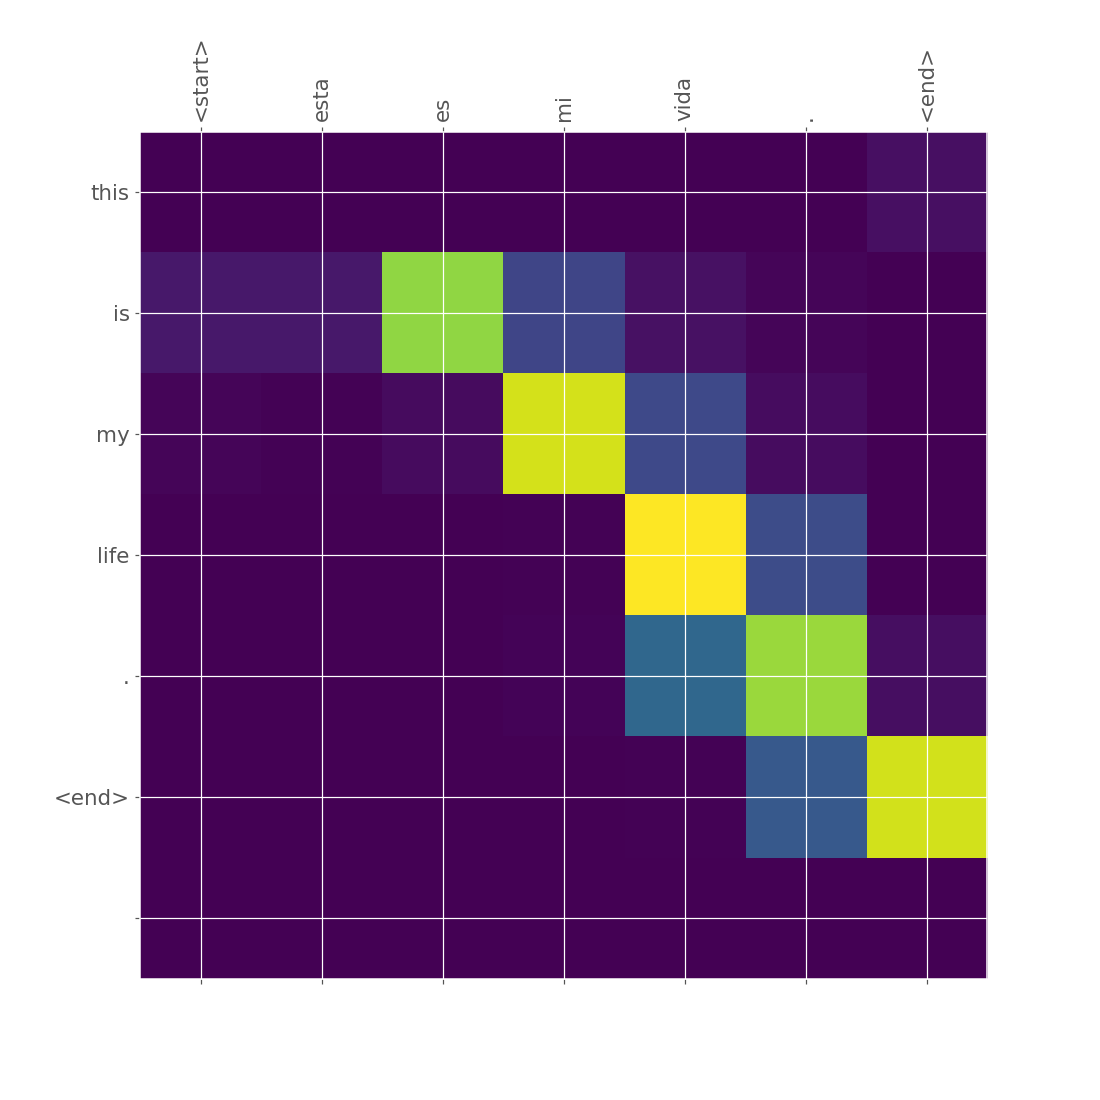

In [49]:
# 번역을 위한 함수 정의 및 번역 문장 입력 함수
def translate(sentence):
    result,sentence,attention_plot=evaluate(sentence)
    
    print('input : %s' % (sentence))
    print('Predicted translation : {}'.format(result))
    
    attention_plot = attention_plot[:len(result.split(' ')), :len(sentence.split(' '))]
    plot_attention(attention_plot, sentence.split(' '), result.split(' ')) # 어텐션 가중치 매핑

checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir)) # 1

translate(u'esta es mi vida.') # 스페인어를 영어로 번역

- 1 : 체크포인트 디렉터리(checkpoint_dir)에서 최신 체크포인트를 복원하여 문장 번역에 대한 테스트 진행

## 버트 (Bert)
- 검색 문장의 단어를 입력된 순서대로 하나씩 처리하는 것이 아니라, 한 문장에서 모든 단어의 연관성을 이해하며 검색 문장을 처리하는 모델
- 전이 학습 기법에 착안하여 자연어 치레옫 사전에 학습된 신경망을 이용해 목적에 맞게 후처리하는 과정을 거쳐 사용
- 전이는 인코더-디코더로 구성, CNN,RNN사용하지 않고 어텐션 모델 도입

- 버트의 두가지 버전
    - BERT-base(L=12,H=768,A=12) : 학습 파라미터 1.1억개
    - BERT-large(L=24,H=1024,A=16) : 학습 파라미터 3.4억개
- L은 전이 블록 숫자, H는 은닉층 크기, A는 전이블록에서 사용되는 어텐션 블록 숫자임. 즉 L,H,A가 클수록 블록을 많이 쌓았고, 표현하는 은닉층이 크며, 어텐션 개수를 많이 사용했다는 의미

In [1]:
!pip install bert-for-tf2
!pip install sentencepiece

In [4]:
# 라이브러리 호출 및 데이터셋 준비
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers
import bert
import pandas as pd
import re
movie_reviews = pd.read_csv("C:/Users/이신행/OneDrive/바탕 화면/딥러닝텐서플로교과서_예제파일/chap10/data/IMDB Dataset.csv")
movie_reviews.isnull().values.any() # 데이터셋에서 어떤 항목이 NaN을 가지고 있는지 확인
movie_reviews.shape

(50000, 2)

In [6]:
# 데이터셋 전처리
def preprocess_text(sen):
    sentence = remove_tags(sen) # html 태그 삭제
    sentence = re.sub('[^a-zA-Z]', ' ', sentence) # 구두점(punctuation) 및 숫자(number) 제거, 문자가아닌것(a~z,A~Z) 제거
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence) # 단일 문자 제거
    sentence = re.sub(r'\s+', ' ', sentence) # 두개이상의 공백 제거
    return sentence
 
TAG_RE = re.compile(r'<[^>]+>') # 정규 표현식(<[^>]+>)을 컴파일
def remove_tags(text):
    return TAG_RE.sub('',text)

reviews=[]
sentences=list(movie_reviews['review'])
for sen in sentences:
    reviews.append(preprocess_text(sen)) # 모든 텍스트 리뷰 데이터를 preprocess_text 함수에 적용
    
print(movie_reviews.columns.values) # 데이터셋의 열에 대한 이름 반환

['review' 'sentiment']


In [7]:
# sentiment열에 대한 고유값 확인
movie_reviews.sentiment.unique()

array(['positive', 'negative'], dtype=object)

In [8]:
# 긍정/부정 감정 변환
y=movie_reviews['sentiment']
y=np.array(list(map(lambda x : 1 if x =='positive' else 0,y)))

In [9]:
# 리뷰 출력
print(reviews[10])

Phil the Alien is one of those quirky films where the humour is based around the oddness of everything rather than actual punchlines At first it was very odd and pretty funny but as the movie progressed didn find the jokes or oddness funny anymore Its low budget film thats never problem in itself there were some pretty interesting characters but eventually just lost interest imagine this film would appeal to stoner who is currently partaking For something similar but better try Brother from another planet 


In [10]:
# 긍정/부정 리뷰 확인
print(y[10])

0


여기까지 버트를 이용해 모델을 만들 준비가 됨

In [11]:
# 텍스트의 토큰화
BertTokenizer = bert.bert_tokenization.FullTokenizer # bert.bert_tokenization 모듈의 FullTokenizer 클래스를 사용하여 객체를 만듬
bert_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1",
                            trainable=False) # 1
vocabulary_file = bert_layer.resolved_object.vocab_file.asset_path.numpy() # 넘파이 배열 형식의 bert 어휘 파일을 만듬
to_lower_case = bert_layer.resolved_object.do_lower_case.numpy() # 텍스트를 소문자로
tokenizer = BertTokenizer(vocabulary_file, to_lower_case) # vocabulary_file 및 to_lower_case 변수를 BertTokenizer 객체에 전달

- 1 : hub.KerasLayer에서 버트 모델을 가져온 후 버트 임베딩 레이어를 생성. 이때 매개변수 trainable이 False로 설정되어 있기 때문에, 버트 임베딩은 학습하지 않음. 여기서 주의해야 할 상황은 berttokenizer에만 적용한다는 것 즉 여기서는 버트 임베딩을 사용하지 않고 있다는 것

In [12]:
# 임의의 문장 토큰화
tokenizer.tokenize("don't be so judgemental")

['don', "'", 't', 'be', 'so', 'judgement', '##al']

In [13]:
# 토큰의 id 반환
tokenizer.convert_tokens_to_ids(tokenizer.tokenize("don't be so judgemental"))

[2123, 1005, 1056, 2022, 2061, 16646, 2389]

In [14]:
# 리뷰 텍스트 데이터 토큰화
def tokenize_reviews(text_reviews): 
    return tokenizer.convert_tokens_to_ids(tokenizer.tokenize(text_reviews)) # 단일 텍스트 리뷰를 입력으로 받아들이면 토큰화가 된 단어의 id를 반환
tokenized_reviews = [tokenize_reviews(review) for review in reviews] # 실제로 입력 데이터셋의 모든 리뷰를 토큰화

In [15]:
# 문장 길이 통일
import random

reviews_with_len = [[review, y[i], len(review)]
                 for i, review in enumerate(tokenized_reviews)] # 토큰화된 리뷰, 리뷰 레이블, 리뷰 길이가 포함된 리스트 생성
random.shuffle(reviews_with_len) # 1
reviews_with_len.sort(key=lambda x: x[2]) # sort() 메서드를 사용하여 리뷰를 기준으로 데이터 정렬
sorted_reviews_labels = [(review_lab[0], review_lab[1]) for review_lab in reviews_with_len]
processed_dataset = tf.data.Dataset.from_generator(lambda: sorted_reviews_labels, output_types=(tf.int32, tf.int32)) # sorted_reviews_labels,output_types에 대한 결과를 int32 형태로 출력
BATCH_SIZE = 32 # 배치 크기를 32로 설정, 즉 리뷰 32건을 처리한 후 신경망의 가중치를 업데이트
batched_dataset = processed_dataset.padded_batch(BATCH_SIZE, padded_shapes=((None, ), ())) # 데이터셋에 패딩 적용
next(iter(batched_dataset)) # 첫번째 배치를 출력하고 패딩이 어떻게 적용되었는지 확인

(<tf.Tensor: shape=(32, 21), dtype=int32, numpy=
 array([[ 3078,  5436,  3078,  3257,  3532,  7613,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0],
        [ 2054,  5896,  2054,  2466,  2054,  6752,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0],
        [ 3191,  1996,  2338,  5293,  1996,  3185,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0],
        [ 2062, 23873,  3993,  2062, 11259,  2172,  2172,  2062, 14888,
             0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0],
        [ 2023,  3185,  2003,  6659,  2021,  2009,  2038,  2070,  2204,
          3896,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0],
        [ 1045,  2876,  9278,  2023,  2028,  2130,  2006,  7922, 12635,
    

- 1 : csv파일에서 전반부는 긍정, 후반부는 부정 리뷰가 포함되어 있어 긍정과 부정 리뷰가 골고루 사용되도록 무작위로 데이터 섞음


- 해당 출력 결과는 리뷰에 대해 첫번재 다섯개, 마지막 다섯개의 패딩을 적용한 결과를 보여줌

In [16]:
# 데이터셋을 훈련과 검증 세트로 분리
import math

TOTAL_BATCHES = math.ceil(len(sorted_reviews_labels) / BATCH_SIZE) # 전체 레코드를 32(배치 크기)로 나누어 줌으로써 전체 배치 크기를 구함
TEST_BATCHES = TOTAL_BATCHES // 10 # 데이터의 10%는 검증을 위해 남겨놓음
batched_dataset.shuffle(TOTAL_BATCHES) 
test_data = batched_dataset.take(TEST_BATCHES) # test_data에 데이터를 저장하려고 batched_dataset()객체의 take() 메서드를 사용
train_data = batched_dataset.skip(TEST_BATCHES) # 나머지 데이터는 skip() 메서드를 사용하여 훈련을 위해 train_data에 저장

In [17]:
# 네트워크 생성
class TEXT_MODEL(tf.keras.Model):
    def __init__(self,
                 vocabulary_size,
                 embedding_dimensions=128,
                 cnn_filters=50,
                 dnn_units=512,
                 model_output_classes=2,
                 dropout_rate=0.1,
                 training=False,
                 name="text_model"): 
        super(TEXT_MODEL, self).__init__(name=name) # 1
        self.embedding = tf.keras.layers.Embedding(vocabulary_size,
                                          embedding_dimensions)
        self.cnn_layer1 = tf.keras.layers.Conv1D(filters=cnn_filters,
                                        kernel_size=2,
                                        padding="valid",
                                        activation="relu")
        self.cnn_layer2 = tf.keras.layers.Conv1D(filters=cnn_filters,
                                        kernel_size=3,
                                        padding="valid",
                                        activation="relu")
        self.cnn_layer3 = tf.keras.layers.Conv1D(filters=cnn_filters,
                                        kernel_size=4,
                                        padding="valid",
                                        activation="relu")
        self.pool = tf.keras.layers.GlobalMaxPool1D() # 합성곱 신경망 계층 세개가 각각 커널또는 필터값(2,3,4)로 초기화됨
        # 이때 원한다면 필터크기를 바꿀수있음
        self.dense_1 = tf.keras.layers.Dense(units=dnn_units,activation='relu') # 입력과 출력을 모두 연결해주는 층, 호라성화함수는 렐루사용
        self.dropout = tf.keras.layers.Dropout(rate=dropout_rate) # 10%에 대해 드롭아웃적용
        if model_output_classes == 2:
            self.last_dense = tf.keras.layers.Dense(units=1,
                                                   activation='sigmoid')
        else:
            self.last_dense=tf.keras.layers.Dense(units=model_output_classes,
                                                 activation='softmax') # 2
            
    def call(self, inputs, training): # 함수를 호출하는 것처럼 클래스의 객체도 호출할 수 있게 만들 수 있는데 이때 필요한 메서드가 __calll__
        l = self.embedding(inputs)
        l_1 = self.cnn_layer1(l) 
        l_1 = self.pool(l_1) 
        l_2 = self.cnn_layer2(l) 
        l_2 = self.pool(l_2)
        l_3 = self.cnn_layer3(l)
        l_3 = self.pool(l_3) # call() 함수 내에서 각 합성곱 신경망계층의 출력에 전역 최대 풀링 적용
        
        concatenated = tf.concat([l_1, l_2, l_3],axis=1) # 합성곱층 세개가 함께 연결되고, 그 출력이 첫번재 신경망에 공급됨
        concatenated = self.dense_1(concatenated) # 두번째로 연결된 신경망은 클래스 두 개만 포함하므로 출력 감정을 예측하는데 사용
        concatenated = self.dropout(concatenated, training)
        model_output = self.last_dense(concatenated) # 모델의 출력층
        return model_output

- 1 : 클래스 생성자에서 일부 속성을 기본값으로 초기화, 이 값들은 추후 TEXT_MODEL 클래스 객체가 만들어질때 전달
- 2 : 출력 클래스가 두개이면, 출력 뉴런을 한개 갖고, 시그모이드 함수를 사용하지만, 그렇지 않다면 출력 뉴런 두개, 소프트맥스 함수 사용

In [18]:
# 하이퍼 파라미터 초기화
VOCAB_LENGTH = len(tokenizer.vocab)
EMB_DIM = 200
CNN_FILTERS = 100
DNN_UNITS = 256
OUTPUT_CLASSES = 2
DROPOUT_RATE = 0.2
NB_EPOCHS = 5

In [19]:
# 하이퍼파라미터 값을 네트워크에 전달
text_model = TEXT_MODEL(vocabulary_size=VOCAB_LENGTH,
                        embedding_dimensions=EMB_DIM,
                        cnn_filters=CNN_FILTERS,
                        dnn_units=DNN_UNITS,
                        model_output_classes=OUTPUT_CLASSES,
                        dropout_rate=DROPOUT_RATE)

In [20]:
# 모델 훈련
if OUTPUT_CLASSES == 2:
    text_model.compile(loss='binary_crossentropy',
                      optimizer='adam',
                      metrics=['accuracy'])
    
else:
    text_model.compile(loss='sparse_categorical_crossentropy',
                      optimizer='adam',
                      metrics=['sparse_categorical_accuracy'])
    
text_model.fit(train_data,epochs=NB_EPOCHS)

Epoch 1/5
1407/1407 [==============================] - 141s 100ms/step - loss: 0.3066 - accuracy: 0.8636
Epoch 2/5
1407/1407 [==============================] - 143s 102ms/step - loss: 0.1294 - accuracy: 0.9536
Epoch 3/5
1407/1407 [==============================] - 143s 102ms/step - loss: 0.0678 - accuracy: 0.9758
Epoch 4/5
1407/1407 [==============================] - 141s 100ms/step - loss: 0.0338 - accuracy: 0.9878
Epoch 5/5
1407/1407 [==============================] - 146s 104ms/step - loss: 0.0195 - accuracy: 0.9930


In [21]:
# 모델 성능 평가
results=text_model.evaluate(test_data)
print(results)

156/156 [==============================] - 2s 10ms/step - loss: 0.4871 - accuracy: 0.8954
[0.4871361553668976, 0.895432710647583]


In [22]:
# 라이브러리 호출
import pandas as pd
import bert
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [23]:
# 데이터셋 메모리로 로딩
train_data = pd.read_csv('C:/Users/이신행/OneDrive/바탕 화면/딥러닝텐서플로교과서_예제파일/chap10/data/train.csv')
test_data = pd.read_csv('C:/Users/이신행/OneDrive/바탕 화면/딥러닝텐서플로교과서_예제파일/chap10/data/test.csv')

In [24]:
# 텍스트 토큰화
url = 'https://tfhub.dev/tensorflow/bert_en_uncased_L-24_H-1024_A-16/2'
bert_layer = hub.KerasLayer(url, trainable=True) # 1

FullTokenizer=bert.bert_tokenization.FullTokenizer

vocab_file=bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case=bert_layer.resolved_object.do_lower_case.numpy()
tokenizer=FullTokenizer(vocab_file,do_lower_case)

- 1 : 버트 토크나이저에서 사용했던 예제와의 차이는 trainiable=True를 사용했다는 것임. 즉 버트 임베딩을 이용하여 학습을 진행하겠다는 의미

In [25]:
# 텍스트 전처리
def bert_encoder(texts, tokenizer, max_len=512):    
    all_tokens = []
    all_masks = []
    all_segments = []
    
    for text in texts:
        text = tokenizer.tokenize(text) # 입력 데이터를 토큰으로 반환
        text = text[:max_len-2]
        input_sequence = ["[CLS]"] + text + ["[SEP]"] # cls/sep 처리(버트에서 입력 값에 대한 임베딩을 위한 식별자)
        pad_len = max_len - len(input_sequence) # 제로 패딩 적용
        tokens = tokenizer.convert_tokens_to_ids(input_sequence)
        tokens += [0] * pad_len
        pad_masks = [1] * len(input_sequence) + [0] * pad_len
        segment_ids = [0] * max_len
        all_tokens.append(tokens)
        all_masks.append(pad_masks)
        all_segments.append(segment_ids)
        
    return np.array(all_tokens), np.array(all_masks), np.array(all_segments)

In [26]:
train_input = bert_encoder(train_data, tokenizer, max_len=160)
train_labels = train_data.target.values

In [28]:
# 모델 생성
def build_model(max_len=512):
    input_word_ids = tf.keras.layers.Input(shape=(max_len,), 
                                 dtype=tf.int32, name='positional_ids') # 입력층에서 사용할 input_word_ids 정의
    input_segment_ids = tf.keras.layers.Input(shape=(max_len,),  # 입력층에서 사용할 input_segment_ids 정의
                                    dtype=tf.int32, name='segment_ids') # 입력층에서 사용할 input_mask 정의
    input_mask = tf.keras.layers.Input(shape=(max_len,), 
                              dtype=tf.int32, name='input_mask')
    pooled_output, sequence_output = bert_layer([input_word_ids, 
                                                 input_mask, 
                                                 input_segment_ids])
    clf_output = sequence_output[:, 0, :]
    output = tf.keras.layers.Dense(1, activation='sigmoid')(clf_output) # 출력층(완전연결층) 정의
    model = tf.keras.Model(inputs=[input_word_ids, input_mask, input_segment_ids], 
                        outputs=output) # 1
    model.compile(optimizer= RMSprop(lr=2e-6), 
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])
    return model
model = build_model(max_len=160)
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
positional_ids (InputLayer)     [(None, 160)]        0                                            
__________________________________________________________________________________________________
input_mask (InputLayer)         [(None, 160)]        0                                            
__________________________________________________________________________________________________
segment_ids (InputLayer)        [(None, 160)]        0                                            
__________________________________________________________________________________________________
keras_layer_1 (KerasLayer)      [(None, 1024), (None 335141889   positional_ids[0][0]             
                                                                 input_mask[0][0]      

- 1 : input_word_ids, input_mask, input_segment_ids를 입력으로 사용하는 버트계층 생성
    - 토큰 id : 버트 토크나이저의 토큰 id
    - 마스크 id : 패딩 토큰 구분을 위한 id, 즉 시퀀스마다 동일한 길이를 갖도록 패딩을 붙여줌
    - 세그먼트 id : 문장을 구분하는 id, 한 문장의 시퀀스가 0이라면 시퀀스에 문장이 2개 있으면서 두번째 문장이라면 1을 표현

In [29]:
# 모델 훈련
train_history=model.fit(train_input,train_labels,
                       validation_split=0.2,epochs=3,batch_size=8)

Epoch 1/3
1/1 [==============================] - 3s 3s/step - loss: 0.3461 - accuracy: 1.0000 - val_loss: 0.1868 - val_accuracy: 1.0000
Epoch 2/3
1/1 [==============================] - 1s 1s/step - loss: 0.2790 - accuracy: 1.0000 - val_loss: 0.1311 - val_accuracy: 1.0000
Epoch 3/3
1/1 [==============================] - 1s 1s/step - loss: 0.1855 - accuracy: 1.0000 - val_loss: 0.0937 - val_accuracy: 1.0000


- 훈련이 진행될수록 오차(loss,val_loss)값은 줄어들고, 정확도(accuracy,val_accuracy)는 높아지므로 훈련이 잘 되었다고 할 수 있음

# 한국어 임베딩

In [15]:
# 예제를 진행할 텍스트 생성
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

text="""과일 가게에 사과가 많이 진열되어 있다
그녀가 나에게 사과한 후, 우리는 친해졌다
애플은 사과 모양을 로고로 사용한다\n"""

In [16]:
# 텍스트 토큰화
tok=Tokenizer()
tok.fit_on_texts([text]) # 1

vocSize=len(tok.word_index)+1

seqs=list()
for word in text.split('\n'):
    encoded=tok.texts_to_sequences([word])[0] # 텍스트를 숫자로 반환
    for i in range(1,len(encoded)):
        seq=encoded[:i+1]
        seqs.append(seq)
        
maxLen=max(len(i) for i in seqs)

seqs=pad_sequences(seqs,maxlen=maxLen,padding='pre')
seqs

array([[ 0,  0,  0,  0,  1,  2],
       [ 0,  0,  0,  1,  2,  3],
       [ 0,  0,  1,  2,  3,  4],
       [ 0,  1,  2,  3,  4,  5],
       [ 1,  2,  3,  4,  5,  6],
       [ 0,  0,  0,  0,  7,  8],
       [ 0,  0,  0,  7,  8,  9],
       [ 0,  0,  7,  8,  9, 10],
       [ 0,  7,  8,  9, 10, 11],
       [ 7,  8,  9, 10, 11, 12],
       [ 0,  0,  0,  0, 13, 14],
       [ 0,  0,  0, 13, 14, 15],
       [ 0,  0, 13, 14, 15, 16],
       [ 0, 13, 14, 15, 16, 17]])

- 1 : 단어 단위로 토큰화하여 딕셔너리에 저장, 이때 text를 x에 넣지 않으면 한글자단위로 인코딩됨

In [17]:
# x값에 대한 정의
seqs=np.array(seqs) # seqs를 배열로 변환한 후 seqs에 저장
x=seqs[:,:-1] # 마지막 열을 제외한 모든 행과 열을 가져옴

In [18]:
# y값에 대한 정의
from tensorflow.keras.utils import to_categorical
y=seqs[:,-1] # 모든 행과 마지막 열만 취함
y=to_categorical(y,num_classes=vocSize) # 케라스에서 제공하는 to_categorical()을 사용하여 원-핫 인코딩 적용

In [19]:
# 모델 생성 및 훈련
import numpy as np
from tensorflow.keras.layers import LSTM 
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.layers import Embedding

model = Sequential() # 모델 생성
model.add(Embedding(vocSize, 10, input_length= maxLen-1, ))         
model.add(LSTM(32))
model.add(Dense(vocSize, activation="softmax")) # 각 단어의 임베딩 벡터가 10차원
model.compile(loss="categorical_crossentropy", metrics = ["accuracy"], optimizer ="adam")
model.fit(x,y,epochs=200)

Epoch 1/200
1/1 [==============================] - 2s 2s/step - loss: 2.8914 - accuracy: 0.0714
Epoch 2/200
1/1 [==============================] - 0s 11ms/step - loss: 2.8897 - accuracy: 0.0714
Epoch 3/200
1/1 [==============================] - 0s 4ms/step - loss: 2.8880 - accuracy: 0.1429
Epoch 4/200
1/1 [==============================] - 0s 4ms/step - loss: 2.8863 - accuracy: 0.0714
Epoch 5/200
1/1 [==============================] - 0s 4ms/step - loss: 2.8846 - accuracy: 0.0714
Epoch 6/200
1/1 [==============================] - 0s 4ms/step - loss: 2.8829 - accuracy: 0.0714
Epoch 7/200
1/1 [==============================] - 0s 3ms/step - loss: 2.8812 - accuracy: 0.0714
Epoch 8/200
1/1 [==============================] - 0s 4ms/step - loss: 2.8794 - accuracy: 0.0714
Epoch 9/200
1/1 [==============================] - 0s 3ms/step - loss: 2.8777 - accuracy: 0.0714
Epoch 10/200
1/1 [==============================] - 0s 4ms/step - loss: 2.8759 - accuracy: 0.0714
Epoch 11/200
1/1 [===========

1/1 [==============================] - 0s 4ms/step - loss: 2.0901 - accuracy: 0.4286
Epoch 85/200
1/1 [==============================] - 0s 4ms/step - loss: 2.0668 - accuracy: 0.5714
Epoch 86/200
1/1 [==============================] - 0s 4ms/step - loss: 2.0436 - accuracy: 0.5714
Epoch 87/200
1/1 [==============================] - 0s 4ms/step - loss: 2.0204 - accuracy: 0.5714
Epoch 88/200
1/1 [==============================] - 0s 4ms/step - loss: 1.9974 - accuracy: 0.6429
Epoch 89/200
1/1 [==============================] - 0s 3ms/step - loss: 1.9745 - accuracy: 0.5714
Epoch 90/200
1/1 [==============================] - 0s 3ms/step - loss: 1.9518 - accuracy: 0.5714
Epoch 91/200
1/1 [==============================] - 0s 3ms/step - loss: 1.9293 - accuracy: 0.5714
Epoch 92/200
1/1 [==============================] - 0s 3ms/step - loss: 1.9070 - accuracy: 0.5714
Epoch 93/200
1/1 [==============================] - 0s 4ms/step - loss: 1.8850 - accuracy: 0.5714
Epoch 94/200
1/1 [===============

1/1 [==============================] - 0s 4ms/step - loss: 0.6992 - accuracy: 1.0000
Epoch 168/200
1/1 [==============================] - 0s 4ms/step - loss: 0.6907 - accuracy: 1.0000
Epoch 169/200
1/1 [==============================] - 0s 4ms/step - loss: 0.6824 - accuracy: 1.0000
Epoch 170/200
1/1 [==============================] - 0s 4ms/step - loss: 0.6742 - accuracy: 1.0000
Epoch 171/200
1/1 [==============================] - 0s 4ms/step - loss: 0.6662 - accuracy: 1.0000
Epoch 172/200
1/1 [==============================] - 0s 3ms/step - loss: 0.6583 - accuracy: 1.0000
Epoch 173/200
1/1 [==============================] - 0s 4ms/step - loss: 0.6506 - accuracy: 1.0000
Epoch 174/200
1/1 [==============================] - 0s 3ms/step - loss: 0.6430 - accuracy: 1.0000
Epoch 175/200
1/1 [==============================] - 0s 4ms/step - loss: 0.6356 - accuracy: 1.0000
Epoch 176/200
1/1 [==============================] - 0s 4ms/step - loss: 0.6282 - accuracy: 1.0000
Epoch 177/200
1/1 [=====

In [22]:
# 단어 예측
def sentGen(model, tok, word, n): # 모델, 토크나이저, 입력단어, 예측 단어 개수를 파라미터로 사용
    sent = ""
    word2=word
    for _ in range(n): # 2회 반복
        encoded = tok.texts_to_sequences([word])[0] 
        encoded = pad_sequences([encoded], maxlen = 7, padding="pre")
        res=model.predict(encoded)
        res=np.argmax(res,axis=1)

        for w , i in tok.word_index.items(): 
            if i == res:  # 예측 단어와 인덱스 단어가 동일할 경우 if문 수행
                break 
        word = word + " " + w
        sent = sent + " " + w
    sent = word2 + sent 
    return sent 

In [23]:
print(sentGen(model, tok, "과일",2))
# 오류가 나서 최종 결과는 올리지 못함

ValueError: in user code:

    File "C:\anaconda\envs\nlp\lib\site-packages\keras\engine\training.py", line 1621, in predict_function  *
        return step_function(self, iterator)
    File "C:\anaconda\envs\nlp\lib\site-packages\keras\engine\training.py", line 1611, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\anaconda\envs\nlp\lib\site-packages\keras\engine\training.py", line 1604, in run_step  **
        outputs = model.predict_step(data)
    File "C:\anaconda\envs\nlp\lib\site-packages\keras\engine\training.py", line 1572, in predict_step
        return self(x, training=False)
    File "C:\anaconda\envs\nlp\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\anaconda\envs\nlp\lib\site-packages\keras\engine\input_spec.py", line 263, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_2" is incompatible with the layer: expected shape=(None, 5), found shape=(None, 7)


In [61]:
tf.__version__

'2.3.0'

In [60]:
!pip install tensorflow==2.7.0

  Using cached tensorflow-2.7.0-cp37-cp37m-win_amd64.whl (430.8 MB)
  Using cached keras-2.7.0-py2.py3-none-any.whl (1.3 MB)
  Using cached libclang-12.0.0-2-py2.py3-none-win_amd64.whl (13.0 MB)
  Using cached flatbuffers-2.0-py2.py3-none-any.whl (26 kB)
  Attempting uninstall: keras
    Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.3.0
    Uninstalling tensorflow-2.3.0:
      Successfully uninstalled tensorflow-2.3.0


ERROR: Could not install packages due to an OSError: [WinError 5] 액세스가 거부되었습니다: 'c:\\anaconda\\envs\\nlp\\lib\\site-packages\\~ensorflow\\lite\\experimental\\microfrontend\\python\\ops\\_audio_microfrontend_op.so'
Consider using the `--user` option or check the permissions.

